In [79]:
import pandas as pd
from matplotlib import pyplot as plt
import sqlite3
import math 
import numpy as np
plt.style.use('fivethirtyeight')

from IPython.core.display import display, HTML

In [80]:
conn = sqlite3.connect('databases.db')

In [81]:
c = conn.cursor()

In [82]:
df = pd.read_csv ('dataset..csv')

In [83]:
df.head(100)

,Kode Kategori,Kategori,Total Buku Keluar,Total Buku Masuk,Rentan Usia,Kode Perpustakaan,Lokasi,Bulan,Tahun,Regional,Email,Alamat Email yang Diberikan,Tahun Berdiri,Di Tengah Kota
0,1,REMAJA,28,13,15 - 20 tahun,X,Jakarta,November,2012,Z,email,Benar,2003,Benar
1,2,DEWASA,21,10,20 - 24 tahun,X,Jakarta,Oktober,2015,Z,email,Benar,2003,Salah
2,3,REMAJA,275,559,15 - 20 tahun,X,Jakarta,Januari,2015,Z,email,Benar,2003,Benar
3,4,DEWASA,73,38,20 - 30 tahun,M8,Solo,Februari,2016,Z,email,Benar,2003,Salah
4,5,DEWASA,182,90,20 - 30 tahun,X,Jakarta,Juli,2016,Z,email,Benar,2003,Salah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,REMAJA,9,2,15 - 20 tahun,C2,Medan,April,2004,Z,email,Benar,2003,Benar
96,3,REMAJA,7,5,15 - 20 tahun,X,Jakarta,Agustus,2013,Z,email,Benar,2003,Benar
97,0,DEWASA,217,16,20 - 24 tahun,R3,Surabaya,November,2013,Z,email,Benar,2003,Salah
98,0,DEWASA,815,7,15 - 20 tahun,R3,Surabaya,Juli,2016,a,Zrint,Salah,2003,Salah


In [ ]:
# ![schema.png](attachment:schema.png)# 

In [85]:
c.executescript('drop table if exists Laporan')
# c.executescript('drop table if exists Keluar')
# c.executescript('drop table if exists Masuk')
c.executescript('drop table if exists lokasi')
c.executescript('drop table if exists Tahun')
c.execute("CREATE TABLE IF NOT EXISTS 'daerah' ('idlokasi' INT, 'Lokasi' VARCHAR(255) NULL, PRIMARY KEY ('idlokasi'))")
# c.execute("CREATE TABLE IF NOT EXISTS 'Masuk' ('idbm' INT, 'total' VARCHAR(255) NULL, PRIMARY KEY ('idbm'))")
# c.execute("CREATE TABLE IF NOT EXISTS 'Keluar' ('idbk' INT, 'total' VARCHAR(255) NULL, PRIMARY KEY ('idbk'))")
c.execute("CREATE TABLE IF NOT EXISTS 'Tahun' ('idtahun' INT, 'Tahun' VARCHAR(255) NULL, PRIMARY KEY ('idtahun'))")
c.execute("CREATE TABLE IF NOT EXISTS 'laporan' ('idfact' INT, 'idtahun' INT, 'idlokasi' INT, 'total' INT, PRIMARY KEY ('idfact'), FOREIGN KEY ('idtahun') REFERENCES 'Tahun' ('idtahun') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('idlokasi') REFERENCES 'daerah' ('idlokasi') ON DELETE NO ACTION ON UPDATE NO ACTION)")

In [86]:
daerah = []
Tahun = []
Masuk = []
Keluar = []
laporan = []
for i,j in df.iterrows():
    if j[8] not in Tahun:
        Tahun.append(j[8])
        
    t = -8
    for index, value in enumerate(Tahun):
        if value == j[8]: 
            t = index+1
            break
        
    if j[6] not in daerah:
        daerah.append(j[6])
        
        

laporan = []
for i,j in df.iterrows():   
    t = -8
    for index, value in enumerate(Tahun):
        if value == j[8]:
            t = index+1
            break
    
    k = -8
    for index, value in enumerate(daerah):
        if value == j[6]:
            
            k = index+1
            
    
    laporan.append([t, k, j[3]])


In [87]:
c.execute("DELETE FROM TAHUN")
for index, i in enumerate(Tahun):
    c.execute("INSERT INTO TAHUN VALUES(" + str(index+1) + ", '" + str(i) + "')")
    
c.execute("DELETE FROM DAERAH")
for index, i in enumerate(daerah): 
    c.execute("INSERT INTO DAERAH VALUES(" + str(index+1) + ", '" + str(i) + "')")

c.execute("DELETE FROM LAPORAN")
for index, i in enumerate(laporan):
    idtahun = i[0]
    idlokasi = i[1]
    c.execute("INSERT INTO LAPORAN VALUES(" + str(index+1) + "," + str(idtahun) + "," + str(idlokasi) + ",'" + str(i[2]) + "')")
    
conn.commit()

In [88]:
c.execute('''SELECT * FROM TAHUN''')

TAHUN = []
for row in c.fetchall():
    TAHUN.append(row)
print("==TAHUN==")
print(TAHUN)
print("====================================================================================================================")

c.execute('''SELECT * FROM DAERAH''')

DAERAH = []
for row in c.fetchall():
    DAERAH.append(row)
print("==DAERAH==")
print(DAERAH)
print("====================================================================================================================")


c.execute('''SELECT * FROM LAPORAN''')

LAPORAN = []
for row in c.fetchall():
    LAPORAN.append(row)
print("==LAPORAN==")
print(LAPORAN)
print("====================================================================================================================")

==TAHUN==
[(1, '2012'), (2, '2015'), (3, '2016'), (4, '2004'), (5, '2014'), (6, '2005'), (7, '2006'), (8, '2007'), (9, '2013'), (10, '2010'), (11, '2011'), (12, '2008')]
==DAERAH==
[(1, 'Jakarta'), (2, 'Solo'), (3, 'Semarang'), (4, 'Balikpapan'), (5, 'Makasar'), (6, 'Bandung'), (7, 'Medan'), (8, 'Surabaya'), (9, 'Jogja'), (10, 'Bali'), (11, 'Papua')]
==LAPORAN==
[(1, 1, 1, 13), (2, 2, 1, 10), (3, 2, 1, 559), (4, 3, 2, 38), (5, 3, 1, 90), (6, 4, 1, 0), (7, 1, 3, 4), (8, 3, 1, 177), (9, 2, 1, 1), (10, 3, 1, 3), (11, 5, 1, 9), (12, 3, 4, 589), (13, 3, 1, 702), (14, 6, 4, 6), (15, 5, 1, 226), (16, 2, 1, 24), (17, 3, 5, 278), (18, 3, 3, 8), (19, 3, 6, 89), (20, 2, 1, 64), (21, 2, 1, 15), (22, 3, 1, 200), (23, 7, 1, 3), (24, 3, 7, 76), (25, 3, 8, 242), (26, 8, 3, 0), (27, 2, 1, 32), (28, 2, 5, 30), (29, 2, 7, 0), (30, 3, 9, 62), (31, 2, 10, 14), (32, 3, 5, 232), (33, 2, 1, 38), (34, 3, 10, 505), (35, 3, 1, 455), (36, 8, 1, 0), (37, 5, 6, 47), (38, 1, 7, 9), (39, 3, 1, 128), (40, 5, 11, 16), 

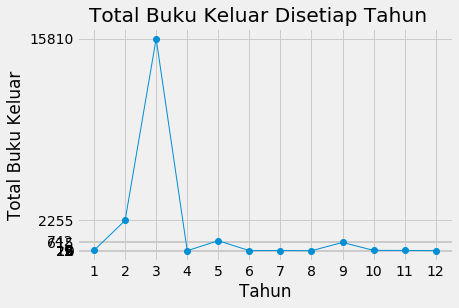

,Tahun,Total Buku Keluar
1,1,26
2,2,2255
3,3,15810
4,4,2
5,5,742
6,6,6
7,7,12
8,8,0
9,9,615
10,10,25


In [98]:
c.execute('''select * from
(
select idtahun, sum(total) as jumlah_total from laporan group by idtahun
)''')
jumlah = []
for row in c.fetchall():
    jumlah.append(row)
np_tahun = np.array(jumlah)

plt.plot([int (x[0]) for x in np_tahun [:,:]], [ int(x[1]) for x in np_tahun[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_tahun[:,:]], [ int(x[0]) for x in np_tahun[:,:]])
plt.yticks([ int(x[1]) for x in np_tahun[:,:]], [ int(x[1]) for x in np_tahun[:,:]])
plt.xlabel('Tahun')
plt.ylabel('Total Buku Keluar')
plt.title("Total Buku Keluar Disetiap Tahun  ")
plt.show()

df = pd.DataFrame([ x for x in np_tahun[:,:]])
df.columns = ['Tahun', 'Total Buku Keluar']
df.index = np.arange(1,len(df)+1)
df

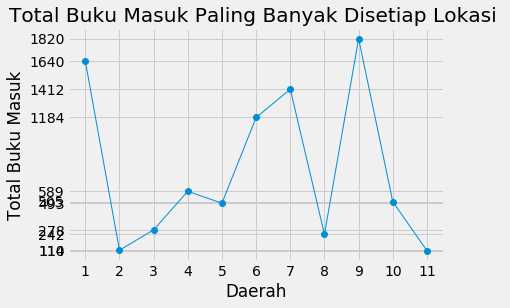

,Daerah,Total Buku Masuk
1,1,1640
2,2,114
3,3,278
4,4,589
5,5,493
6,6,1184
7,7,1412
8,8,242
9,9,1820
10,10,505


In [93]:
c.execute('''select * from
(
select idlokasi , max(total) as max_total_buku_Masuk from laporan group by idlokasi
)''')
total = []
for row in c.fetchall():
    total.append(row)
np_daerah_tujuan_destinasi = np.array(total)

plt.plot([int (x[0]) for x in np_daerah_tujuan_destinasi [:,:]], [ int(x[1]) for x in np_daerah_tujuan_destinasi[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_daerah_tujuan_destinasi[:,:]], [ int(x[0]) for x in np_daerah_tujuan_destinasi[:,:]])
plt.yticks([ int(x[1]) for x in np_daerah_tujuan_destinasi[:,:]], [ int(x[1]) for x in np_daerah_tujuan_destinasi[:,:]])
plt.xlabel('Daerah')
plt.ylabel('Total Buku Masuk')
plt.title("Total Buku Masuk Paling Banyak Disetiap Lokasi ")
plt.show()

df = pd.DataFrame([ x for x in np_daerah_tujuan_destinasi[:,:]])
df.columns = ['Daerah', 'Total Buku Masuk']
df.index = np.arange(1,len(df)+1)
df